# Install requerements

In [3]:
pip install tabula-py[jpype]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 54.4 MB/s eta 0:00:00


In [4]:
import requests
from tabula import read_pdf
import pandas as pd

# Download the PDF

In [5]:
pdf_url = "https://www.boe.es/boe/dias/2016/12/17/pdfs/BOE-A-2016-11948.pdf"
pdf_path = "BOE-A-2016-11948.pdf"

In [6]:
response = requests.get(pdf_url, stream=True)

with open(pdf_path, 'wb') as pdf_file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
          pdf_file.write(chunk)

my code

In [85]:
pdf_path = "/content/TR Estratto June 2024.pdf"

view images

In [80]:
!pip install pdf2image
!apt-get install poppler-utils

ERROR: Could not find a version that satisfies the requirement poppler (from versions: none)
ERROR: No matching distribution found for poppler


In [83]:
from pdf2image import convert_from_path

pages = convert_from_path(pdf_path)
for page in pages:
    page.save("page_image.jpg")

In [180]:
from pdf2image import convert_from_path
import numpy as np

images_of_pdf = convert_from_path(pdf_path, dpi=200)  # Convert PDF to List of PIL Images
for i,page in enumerate(pages):
    page.save("page_image_"+str(i)+".jpg")
readable_images_of_pdf = []  # Create a list for thr for loop to put the images into
for PIL_Image in images_of_pdf:
    readable_images_of_pdf.append(np.array(PIL_Image))  # Add items to list

In [181]:
import cv2
import numpy as np
from pdf2image import convert_from_path

image_of_pdf = np.concatenate(tuple(convert_from_path(pdf_path)), axis=0)

In [182]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread("/content/page_image_2.jpg", cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (int(595.28), int(841.88)), interpolation=cv2.INTER_LINEAR)
#cv2_imshow(img)
# Get the dimensions of the image
height, width, channels = img.shape

print(f"Width: {width}, Height: {height}, Channels: {channels}")

Width: 595, Height: 841, Channels: 3


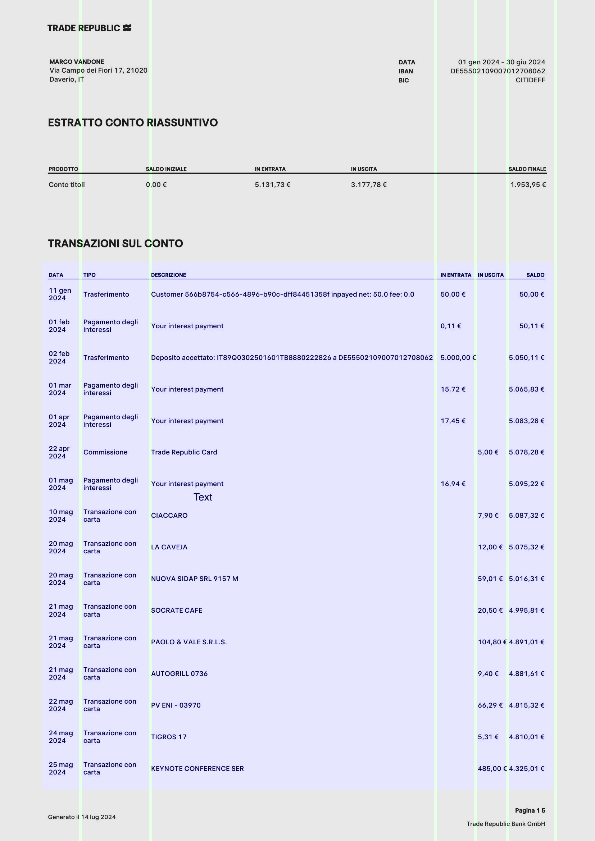

In [224]:
# Define the x points for vertical lines
x_points = [80, 150, 435, 475, 507, 555]  # Example x points

# Define the area to color (top, left, bottom, right)
area = [59.9,42.042,790.606,556.959]
area_p1 = [262.295,42.042,789.118,552.494]

area_preview = area #area_p1

#reset the image every time
img = cv2.imread("/content/page_image_0.jpg", cv2.IMREAD_UNCHANGED)
img = cv2.resize(img, (int(595.28), int(841.88)), interpolation=cv2.INTER_LINEAR)

overlay = np.ones((img.shape[0], img.shape[1], 4), dtype='uint8')

# Convert the original image to BGRA (with alpha channel)
img_bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)

# Color the defined area
cv2.rectangle(overlay, (int(area_preview[1]), int(area_preview[0])), (int(area_preview[3]), int(area_preview[2])), (255, 0, 0, 125), -1)  # Blue filled rectangle


# Draw vertical lines
for x in x_points:
    cv2.line(overlay, (x, 0), (x, img.shape[0]), (0, 255, 0,255), 2)  # Green vertical lines

# Blend the overlay with the original image
combined = cv2.addWeighted(img_bgra, 0.9, overlay, 0.2, 0)

# Display the image
cv2_imshow(combined)

# Extract tables

In [231]:
pandas_options = {
    'header': None,
    'columns' : ["DATA", "TIPO", "DESCRIZIONE", "IN ENTRATA","IN USCITA", "SALDO"]
}

In [265]:
with open(pdf_path, 'rb') as file:
        # extract table from pages
        dfs = read_pdf(
            file,
            pages="2-5", # pages to extract table from
            area=area,
            columns=x_points,
            #lattice=True,
            pandas_options=pandas_options,
            stream=True,
        )

        # extract table in page 4
        dfs_1 = read_pdf(
              file,
              pages=1,
              area=area_p1,
              columns=x_points,
              pandas_options=pandas_options,
              stream = True,
        )

dfs[0]
#dfs_1[0]

,DATA,TIPO,DESCRIZIONE,IN ENTRATA,IN USCITA,SALDO
0,26 mag,Transazione con,NaN,NaN,NaN,NaN
1,NaN,NaN,ASPIT DIREZ. USCITA -,NaN,"1,80 €","4.249,23 €"
2,2024,carta,NaN,NaN,NaN,NaN
3,26 mag,Transazione con,NaN,NaN,NaN,NaN
4,NaN,NaN,IL PINZIMONIO,NaN,"9,58 €","4.239,65 €"
5,2024,carta,NaN,NaN,NaN,NaN
6,28 mag,Transazione con,NaN,NaN,NaN,NaN
7,NaN,NaN,AERLING 22IJ32 VANDON,NaN,"421,87 €","3.817,78 €"
8,2024,carta,NaN,NaN,NaN,NaN
9,30 mag,Transazione con,NaN,NaN,NaN,NaN


In [266]:
dfs.extend(dfs_1)

# concat all dfs to get one table
data = pd.concat(
    dfs,
    axis=0,
    ignore_index=True
)
data

,DATA,TIPO,DESCRIZIONE,IN ENTRATA,IN USCITA,SALDO
0,26 mag,Transazione con,NaN,NaN,NaN,NaN
1,NaN,NaN,ASPIT DIREZ. USCITA -,NaN,"1,80 €","4.249,23 €"
2,2024,carta,NaN,NaN,NaN,NaN
3,26 mag,Transazione con,NaN,NaN,NaN,NaN
4,NaN,NaN,IL PINZIMONIO,NaN,"9,58 €","4.239,65 €"
...,...,...,...,...,...,...
167,NaN,NaN,TIGROS 17,NaN,"5,31 €","4.810,01 €"
168,2024,carta,NaN,NaN,NaN,NaN
169,25 mag,Transazione con,NaN,NaN,NaN,NaN
170,NaN,NaN,KEYNOTE CONFERENCE SER,NaN,"485,00 €","4.325,01 €"


In [267]:
# prompt: if a row contains pandas_options.columns, drop that row and reset the index
# . if KeyError: "None of [Index(['DATA', 'TIPO', 'DESCRIZIONE', 'IN ENTRATA', 'IN USCITA', 'SALDO'], dtype='object')] are in the [columns]"
# says "everything ok"

# Drop rows if they contain all column names
try:
  data = data.drop(data[data.apply(lambda row: all(item in row.values for item in pandas_options['columns']), axis=1)].index)
  # Reset the index
  data = data.reset_index(drop=True)
except KeyError:
  print("everything ok")
data


,DATA,TIPO,DESCRIZIONE,IN ENTRATA,IN USCITA,SALDO
0,26 mag,Transazione con,NaN,NaN,NaN,NaN
1,NaN,NaN,ASPIT DIREZ. USCITA -,NaN,"1,80 €","4.249,23 €"
2,2024,carta,NaN,NaN,NaN,NaN
3,26 mag,Transazione con,NaN,NaN,NaN,NaN
4,NaN,NaN,IL PINZIMONIO,NaN,"9,58 €","4.239,65 €"
...,...,...,...,...,...,...
166,NaN,NaN,TIGROS 17,NaN,"5,31 €","4.810,01 €"
167,2024,carta,NaN,NaN,NaN,NaN
168,25 mag,Transazione con,NaN,NaN,NaN,NaN
169,NaN,NaN,KEYNOTE CONFERENCE SER,NaN,"485,00 €","4.325,01 €"


In [268]:
# prompt: now each entry is actually subdivided over 3 rows, i want to merge each 3 consecutive rows into a single one contcatenating. the text inside each column in the corresponding cell. when NaN is encountered, add""

# Group the DataFrame by every 3 rows
grouped = data.groupby(data.index // 3)

# Aggregate the text within each group
result = grouped.agg(lambda x: ''.join(x.fillna('')))

# Reset the index
result = result.reset_index(drop=True)

result


,DATA,TIPO,DESCRIZIONE,IN ENTRATA,IN USCITA,SALDO
0,26 mag2024,Transazione concarta,ASPIT DIREZ. USCITA -,,"1,80 €","4.249,23 €"
1,26 mag2024,Transazione concarta,IL PINZIMONIO,,"9,58 €","4.239,65 €"
2,28 mag2024,Transazione concarta,AERLING 22IJ32 VANDON,,"421,87 €","3.817,78 €"
3,30 mag2024,Transazione concarta,SUMUP *A&A S.R.L.S,,"30,00 €","3.787,78 €"
4,30 mag2024,Transazione concarta,QUERCIA GIOIELLI,,"100,00 €","3.687,78 €"
5,30 mag2024,Transazione concarta,AUTOSILO SEMPIONE,,"1,50 €","3.686,28 €"
6,31 mag2024,Transazione concarta,SISTEMA CONGRESSI SRL,,"300,00 €","3.386,28 €"
7,01 giu2024,Pagamento degliinteressi,Your interest payment,"16,51 €",,"3.402,79 €"
8,02 giu2024,Transazione concarta,FARMACIA EUROPA S.R.L.,,"16,55 €","3.386,24 €"
9,03 giu2024,Premio,Your Saveback payment,"15,00 €",,"3.401,24 €"


,DATA,TIPO,DESCRIZIONE,IN ENTRATA,IN USCITA,SALDO
0,26 mag2024,Transazione concarta,ASPIT DIREZ. USCITA -,,"1,80 €","4.249,23 €"
1,26 mag2024,Transazione concarta,IL PINZIMONIO,,"9,58 €","4.239,65 €"
2,28 mag2024,Transazione concarta,AERLING 22IJ32 VANDON,,"421,87 €","3.817,78 €"
3,30 mag2024,Transazione concarta,SUMUP *A&A S.R.L.S,,"30,00 €","3.787,78 €"
4,30 mag2024,Transazione concarta,QUERCIA GIOIELLI,,"100,00 €","3.687,78 €"
...,...,...,...,...,...,...
69,202421 mag,cartaTransazione con,PAOLO & VALE S.R.L.S.,,"104,80 €","4.891,01 €"
70,202422 mag,cartaTransazione con,AUTOGRILL 0736,,"9,40 €","4.881,61 €"
71,202424 mag,cartaTransazione con,PV ENI - 03970,,"66,29 €","4.815,32 €"
72,202425 mag,cartaTransazione con,TIGROS 17,,"5,31 €","4.810,01 €"


# Export data to CSV

In [269]:
result.to_csv("output.csv", index=False)